In [0]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not available
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Uninstalling opencv-python-3.4.7.28:
  Successfully uninstalled opencv-python-3.4.7.28
     |████████████████████████████████| 30.6MB 80kB/s 
     |████████████████████████████████| 20.0MB 124kB/s 
ERROR: tensor2tensor 1.14.1 requires opencv-python, which is not installed.
ERROR: stable-baselines 2.2.1 requires opencv-python, which is not installed.
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: gym 0.15.4 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.4
    Uninstalling numpy-1.17.4:
      Successfully uninstalled numpy-1.17.4
  Found

In [0]:
import cv2
import imutils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from sklearn.cluster import KMeans
#configuracion necesaria de pyplot para ver las imagenes en escala de grises
plt.rcParams['image.cmap'] = 'gray'
# comando de Jupyter para que las imagenes se muestren automaticamente 
%matplotlib inline

In [0]:
cv2.__version__

'3.4.2'

# CREACION DE LAS ENTRADAS

## Ruta actual

In [0]:
import os
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
ls -l drive/My\ Drive/'2019-2 #CICLO_10♥'/'TESIS 2'/DATA/

total 47717
-rw------- 1 root root  1591207 Nov  5 13:09 'Copia de PROCESAMIENTO DE DATOS - Imagenes.ipynb'
-rw------- 1 root root   617976 Nov  5 03:48 'EXTRACION DE DATA - TESIS 2 - FINAL REAL.ipynb'
drwx------ 2 root root     4096 Nov  5 09:53  IMAGENES_TESIS/
drwx------ 3 root root     4096 Nov  9 17:33  MODELOS_2/
-rw------- 1 root root  1123847 Nov 19 23:52 'PROCESAMIENTO DE DATOS - Imagenes - ORB.ipynb'
-rw------- 1 root root  1915934 Nov 20 00:11 'PROCESAMIENTO DE DATOS - Imagenes - SIFT.ipynb'
-rw------- 1 root root  1924116 Nov 19 18:35 'PROCESAMIENTO DE DATOS - Imagenes - SURF.ipynb'
-rw------- 1 root root  5736808 Nov  5 03:48 'PROCESAMIENTO DE DATOS - Text Mining -Comentarios y Me Gusta.ipynb'
-rw------- 1 root root   838212 Nov 19 03:00 'PROCESAMIENTO DE DATOS - Text Mining - Titulo del Post (1).ipynb'
-rw------- 1 root root  1532709 Nov 19 18:49 'PROCESAMIENTO DE DATOS - Text Mining - Titulo del Post.ipynb'
drwx------ 2 root root     4096 Nov 19 01:51  SIN_IMPORTANCIA/
-

In [0]:
directorio = 'drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/'
directorio

'drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/'

In [0]:
num_imagenes = 10350
num_imagenes

10350

In [0]:
carpeta_fotos = []
for i in os.listdir(directorio):
    #print(i[0])
    if i[0:6] != ".ipynb" and i[-6::]!=".ipynb"  and i[-5::]!=".xlsx" and i =="IMAGENES_TESIS":
        carpeta_fotos.append(i)
carpeta_fotos

['IMAGENES_TESIS']

In [0]:
os.close

<function posix.close>

## FUNCIONES

In [0]:
def Funcion_Kmeans_N(vect_carac, num_clus):
  
  vect_carac1=np.asarray(vect_carac)
  vect_carac1=np.concatenate(vect_carac1, axis=0)
  clusters = KMeans(n_clusters=num_clus, random_state=0, 
                    max_iter = 100 ).fit(vect_carac1)

  return clusters

In [0]:
def Funcion_Sift(ruta_imag):
    image = cv2.imread(ruta_imag)
    image = cv2.resize(image, (224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.astype('uint8')
    sift = cv2.xfeatures2d.SIFT_create(200)
    k, d = sift.detectAndCompute(image, None)
    return [k, d]   


## PREDICCION SIFT

### Guardando los vectores

In [0]:
%%time
vect_Sift = []
img_none2=[]
contador2 = 7300
conta = 7300

for i in range(7300, num_imagenes):
    imagen_nom = str(i)+"_img.jpg"
    ruta_archivo_img = os.path.join(directorio,carpeta_fotos[0],imagen_nom)
    #print(str(i)+": "+ruta_archivo_img)    
    keypoints, descriptors3 = Funcion_Sift(ruta_archivo_img)

    try:
        print("Vector del Sift "+str(conta)+": "+str(len(descriptors3)))
        #vect_Sift.append(descriptors3)
        #Guardo el valor de los vectores
        name_dat = str(i)+"_vect_Sift"+".dat"
        direc = os.path.join(directorio,"MODELOS_2","VECTORES_SIFT_2",name_dat)
        np.savetxt(direc, descriptors3 )
        
        contador2 =contador2+1
    except TypeError:
        print("Vector del Sift "+str(conta)+": "+"None")
        img_none2.append(conta)
        #vect_Sift.append(keypoints), no agarra con esto

    conta =conta+1
    print(" ----------------------")

cv2.destroyAllWindows()    

Vector del Sift 7300: 200
 ----------------------
Vector del Sift 7301: 102
 ----------------------
Vector del Sift 7302: 200
 ----------------------
Vector del Sift 7303: 17
 ----------------------
Vector del Sift 7304: 7
 ----------------------
Vector del Sift 7305: 47
 ----------------------
Vector del Sift 7306: None
 ----------------------
Vector del Sift 7307: None
 ----------------------
Vector del Sift 7308: 200
 ----------------------
Vector del Sift 7309: None
 ----------------------
Vector del Sift 7310: 200
 ----------------------
Vector del Sift 7311: 201
 ----------------------
Vector del Sift 7312: 201
 ----------------------
Vector del Sift 7313: 200
 ----------------------
Vector del Sift 7314: 173
 ----------------------
Vector del Sift 7315: 200
 ----------------------
Vector del Sift 7316: 200
 ----------------------
Vector del Sift 7317: 200
 ----------------------
Vector del Sift 7318: 200
 ----------------------
Vector del Sift 7319: 200
 ----------------------
V

In [0]:
img_none2

[7306, 7307, 7309]

In [0]:
contador2

10347

### Cargando los vectores caracteristicos de cada imagen - SIFT

In [0]:
%%time
contador2 = 0
img_none2 = []
vectores_Si = []
for i in range(0, num_imagenes):
  name_dat = str(i)+"_vect_Sift"+".dat"
  direc = os.path.join(directorio,"MODELOS_2","VECTORES_SIFT_2",name_dat) 
  print(direc)   
  try:
    vectores_Si.append(np.loadtxt(direc))
    contador2 = contador2 + 1
  except OSError:
    img_none2.append(i)

drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VECTORES_SIFT_2/0_vect_Sift.dat
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VECTORES_SIFT_2/1_vect_Sift.dat
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VECTORES_SIFT_2/2_vect_Sift.dat
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VECTORES_SIFT_2/3_vect_Sift.dat
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VECTORES_SIFT_2/4_vect_Sift.dat
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VECTORES_SIFT_2/5_vect_Sift.dat
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VECTORES_SIFT_2/6_vect_Sift.dat
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VECTORES_SIFT_2/7_vect_Sift.dat
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VECTORES_SIFT_2/8_vect_Sift.dat
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VECTORES_SIFT_2/9_vect_Sift.dat
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VECTORES_SIFT_2/10_vect_Sift.dat
drive/My Drive/2019-2 #CICLO_10

In [0]:
vectores_Si[0].shape

(200, 128)

In [0]:
contador2 = 10347

In [0]:
contador2  # Real :10347

10347

In [0]:
img_none2 # real: [7306, 7307, 7309]

[7306, 7307, 7309]

In [0]:
#del img_none2[0]

In [0]:
img_none2 = [7306, 7307, 7309]
#del img_none2[0]

In [0]:
vectores_Sift = []
name_dat = str(0)+"_vect_Sift"+".dat"
direc = os.path.join(directorio,"MODELOS_2","VECTORES_SIFT_2",name_dat)    
print(direc)
vectores_Sift.append(np.loadtxt(direc))
vectores_Sift[0]

drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VECTORES_SIFT_2/0_vect_Sift.dat


array([[  1.,  15., 127., ...,   0.,   3.,  11.],
       [ 10.,   4.,  30., ...,   9.,   0.,   2.],
       [  7.,  14.,   9., ...,  55.,  22.,   1.],
       ...,
       [ 33.,   2.,   9., ...,   2.,   7.,  22.],
       [  7.,  41.,  39., ...,  10.,  13.,  18.],
       [  7.,   0.,   2., ...,  40.,  37.,   6.]])

In [0]:
print(vectores_Si[0])

[[  1.  15. 127. ...   0.   3.  11.]
 [ 10.   4.  30. ...   9.   0.   2.]
 [  7.  14.   9. ...  55.  22.   1.]
 ...
 [ 33.   2.   9. ...   2.   7.  22.]
 [  7.  41.  39. ...  10.  13.  18.]
 [  7.   0.   2. ...  40.  37.   6.]]


In [0]:
len(vectores_Sift)
vectores_Sift[0].shape

(875, 128)

In [0]:
#En caso de que agarre bien
vectores_Sift = vectores_Si

In [0]:
#En caso de que no agarre
contaaa = 0 
for i in vectores_Si:
  vectores_Sift.append(i)
  contaaa = contaaa + 1 

print(contaaa)

10347


In [0]:
len(vectores_Sift)

10347

In [0]:
for i in range(0, len(vectores_Sift)):
  vectores_Sift[i] = vectores_Sift[i].reshape(-1,128)
  print(vectores_Sift[i].shape)

(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(201, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(201, 128)
(200, 128)
(200, 128)
(201, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(143, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(120, 128)
(183, 128)
(200, 128)
(201, 128)
(201, 128)
(94, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(201, 128)
(200, 128)
(200, 128)
(200, 128)
(182, 128)
(200, 128)
(201, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(200, 128)
(157, 128)


### Guardar de un solo lote

In [0]:
import joblib
filename = os.path.join(directorio,"MODELOS_2","vect_total_sift")
joblib.dump(vectores_Sift, filename) 

In [0]:
vectores_Sift[0:10]

[array([[  1.,  15., 127., ...,   0.,   3.,  11.],
        [ 10.,   4.,  30., ...,   9.,   0.,   2.],
        [  7.,  14.,   9., ...,  55.,  22.,   1.],
        ...,
        [ 33.,   2.,   9., ...,   2.,   7.,  22.],
        [  7.,  41.,  39., ...,  10.,  13.,  18.],
        [  7.,   0.,   2., ...,  40.,  37.,   6.]]),
 array([[  2.,   1.,   0., ...,   1.,   0.,   2.],
        [  0.,   1.,   8., ...,   0.,   0.,   1.],
        [  0.,   0.,   1., ...,   1.,  14.,  36.],
        ...,
        [ 10.,   3.,   2., ...,  89., 103.,   2.],
        [ 60.,   9.,   0., ...,   4.,   0.,   3.],
        [  3.,   2.,   0., ...,  79.,  44.,   0.]]),
 array([[  0.,  74., 120., ...,  22.,   0.,   2.],
        [  0.,  11.,   5., ...,  20.,   1.,   2.],
        [  4.,  94.,  47., ...,   0.,  21.,  51.],
        ...,
        [ 54.,  48.,   4., ...,  11.,   2.,  10.],
        [  1.,   1.,  64., ...,  33.,  20.,  59.],
        [127.,  65.,   2., ...,   5.,   6.,   0.]]),
 array([[  1.,   2.,   7., ...,  44.,

In [0]:
#load saved model
import joblib
filename = os.path.join(directorio,"MODELOS_2","vect_total_sift")
vectores_Sift = joblib.load(filename)
vectores_Sift[0:10]

[array([[  1.,  15., 127., ...,   0.,   3.,  11.],
        [ 10.,   4.,  30., ...,   9.,   0.,   2.],
        [  7.,  14.,   9., ...,  55.,  22.,   1.],
        ...,
        [ 33.,   2.,   9., ...,   2.,   7.,  22.],
        [  7.,  41.,  39., ...,  10.,  13.,  18.],
        [  7.,   0.,   2., ...,  40.,  37.,   6.]]),
 array([[  2.,   1.,   0., ...,   1.,   0.,   2.],
        [  0.,   1.,   8., ...,   0.,   0.,   1.],
        [  0.,   0.,   1., ...,   1.,  14.,  36.],
        ...,
        [ 10.,   3.,   2., ...,  89., 103.,   2.],
        [ 60.,   9.,   0., ...,   4.,   0.,   3.],
        [  3.,   2.,   0., ...,  79.,  44.,   0.]]),
 array([[  0.,  74., 120., ...,  22.,   0.,   2.],
        [  0.,  11.,   5., ...,  20.,   1.,   2.],
        [  4.,  94.,  47., ...,   0.,  21.,  51.],
        ...,
        [ 54.,  48.,   4., ...,  11.,   2.,  10.],
        [  1.,   1.,  64., ...,  33.,  20.,  59.],
        [127.,  65.,   2., ...,   5.,   6.,   0.]]),
 array([[  1.,   2.,   7., ...,  44.,

In [0]:
vect_carac1=np.asarray(vectores_Sift)
vect_carac1=np.concatenate(vect_carac1, axis=0)
vect_carac1

array([[  1.,  15., 127., ...,   0.,   3.,  11.],
       [ 10.,   4.,  30., ...,   9.,   0.,   2.],
       [  7.,  14.,   9., ...,  55.,  22.,   1.],
       ...,
       [ 17.,  25.,  62., ...,   0.,   0.,   2.],
       [ 81.,   1.,   4., ...,   3.,   1.,   4.],
       [ 22.,  44.,  11., ...,   0.,   0.,   5.]])

In [0]:
vect_carac1.shape # la longitud actual
# antes tenia: (4010654, 128)
#ahora (1964549, 128)

(1964549, 128)

In [0]:
len(vectores_Sift)

10347

In [0]:
contador2 = 10347
contador2

10347

In [0]:
img_none2 = [7306, 7307, 7309]
img_none2
#del img_none2[0]

[7306, 7307, 7309]

### Con 10p


In [0]:
%%time
kmeans_Sift_10 = Funcion_Kmeans_N(vectores_Sift, 10)
print(kmeans_Sift_10)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
CPU times: user 11min 17s, sys: 51.7 s, total: 12min 9s
Wall time: 10min 16s


In [0]:
#save model
filename = os.path.join(directorio,"MODELOS_2","kmeans_Sift_10")
joblib.dump(kmeans_Sift_10, filename) 


['drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/kmeans_Sift_10']

In [0]:
#load saved model
filename = os.path.join(directorio,"MODELOS_2","kmeans_Sift_10")
mod_km10 = joblib.load(filename)
mod_km10

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [0]:
mod_km10.cluster_centers_

array([[19.18826167, 32.98976891, 43.27595335, ..., 21.5081491 ,
        27.58613913, 26.17683337],
       [14.30187918, 16.0288154 , 21.04802068, ..., 12.71905981,
        11.02271754, 12.28672917],
       [39.7846169 , 25.90044564, 14.51545573, ..., 24.1128927 ,
        14.5728346 , 15.36143392],
       ...,
       [22.19801086, 30.32277881, 31.24843304, ...,  9.02181268,
         6.68255085, 12.14000339],
       [30.11815667, 29.40619053, 22.93171056, ...,  9.6641071 ,
        16.01510843, 17.73519031],
       [16.28708439, 10.09556368,  9.91803208, ..., 14.51856275,
        12.20272058, 17.00302525]])

In [0]:
entra_sift_10 = []
for i in range(0,len(vectores_Sift)):
    kma = mod_km10.predict(vectores_Sift[i])
    hist, bin_edges=np.histogram(kma,bins = 10)
    feature_vectors=np.asarray(hist)
    entra_sift_10.append(feature_vectors)
entra_sift_10[0:2]

[array([42, 33,  7,  7, 42,  0, 16, 27, 12, 14]),
 array([18, 30, 11, 14, 46,  0, 27, 23, 14, 17])]

In [0]:
len(entra_sift_10)

10347

In [0]:
img_none2

[7306, 7307, 7309]

In [0]:
vector_entradas = []
cont=0
for i in range(0, num_imagenes):
  if i in img_none2:
    vector_entradas.append(np.zeros((10,), dtype=int))
    print(i)
  else:
    vector_entradas.append(entra_sift_10[cont])
    cont = cont + 1

7306
7307
7309


In [0]:
tabla_entra_Sift_10 = pd.DataFrame(vector_entradas)
tabla_entra_Sift_10.head()

,0,1,2,3,4,5,6,7,8,9
0,42,33,7,7,42,0,16,27,12,14
1,18,30,11,14,46,0,27,23,14,17
2,48,26,8,4,66,0,19,17,4,8
3,30,42,5,3,46,0,17,39,3,15
4,43,27,7,12,53,0,15,21,8,14


In [0]:
filename_final = os.path.join(directorio,"MODELOS_2","tabla_entra_Sift_10.xlsx")
tabla_entra_Sift_10.to_excel(filename_final, index = False )

### Con 50p

In [0]:
kmeans_Sift_50 = Funcion_Kmeans_N(vectores_Sift, 50)
print(kmeans_Sift_50)

In [0]:
#save model
filename = os.path.join(directorio,"MODELOS_2","kmeans_Sift_50")
joblib.dump(kmeans_Sift_50, filename) 


In [0]:
#load saved model
filename = os.path.join(directorio,"MODELOS_2","kmeans_Sift_50")
mod_km50 = joblib.load(filename)
mod_km50

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [0]:
mod_km50.cluster_centers_

array([[11.98958252, 11.70779238, 17.35406463, ..., 14.52603073,
        13.88413797, 14.57982845],
       [26.95380913, 28.94686314, 24.4119223 , ..., 11.46880504,
        21.49502617, 28.30924562],
       [11.87653689,  7.64794923,  8.52531969, ...,  3.56533106,
         2.63859051,  6.91245619],
       ...,
       [21.128715  , 19.7607119 , 19.53917834, ..., 16.14255278,
        17.88643553, 20.59480922],
       [32.39258819, 17.39094615, 11.30824982, ...,  8.56517185,
         6.579752  , 25.03671933],
       [12.65538034,  6.05540765,  5.38892302, ...,  4.6848249 ,
         3.61007577,  8.7956402 ]])

In [0]:
"""contador2=contador2+1
"""
contador2

10347

In [0]:
# del(img_none2[0])

In [0]:
img_none2

[7306, 7307, 7309]

In [0]:
vectores_Sift[0]

array([[  1.,  15., 127., ...,   0.,   3.,  11.],
       [ 10.,   4.,  30., ...,   9.,   0.,   2.],
       [  7.,  14.,   9., ...,  55.,  22.,   1.],
       ...,
       [ 33.,   2.,   9., ...,   2.,   7.,  22.],
       [  7.,  41.,  39., ...,  10.,  13.,  18.],
       [  7.,   0.,   2., ...,  40.,  37.,   6.]])

In [0]:
len(vectores_Sift)

10347

In [0]:
entra_sift_50 = []
for i in range(0,len(vectores_Sift)):
    kma = mod_km50.predict(vectores_Sift[i])
    hist, bin_edges=np.histogram(kma, bins=50)
    feature_vectors=np.asarray(hist)
    entra_sift_50.append(feature_vectors)
entra_sift_50[0:2]

[array([ 2,  5,  0,  2,  2,  2,  0, 13,  3,  0,  6,  1,  2, 17, 11,  1,  8,
         2, 10,  3,  7, 10,  3,  3,  4,  0,  0,  5,  1,  0,  1,  5,  1,  0,
         0,  4,  7,  7, 12, 10,  5,  2,  0,  4,  3,  0,  2, 11,  2,  1]),
 array([ 2,  4,  0,  5,  2,  1,  1,  7,  4,  1,  5,  1,  1,  8,  8,  8, 10,
         0,  7,  4,  3, 11,  4,  3,  3,  0,  0,  2,  3,  3,  1,  3,  0,  2,
         0,  3, 12,  6, 15, 12, 13,  2,  2,  2,  3,  0,  4,  0,  5,  4])]

In [0]:
vector_entradas = []
cont=0
for i in range(0, num_imagenes):
  if i in img_none2:
    vector_entradas.append(np.zeros((50,), dtype=int))
    print(i)
  else:
    vector_entradas.append(entra_sift_50[cont])
    cont = cont + 1

7306
7307
7309


In [0]:
tabla_entra_sift_50 = pd.DataFrame(vector_entradas)
filename_final = os.path.join(directorio,"MODELOS_2","tabla_entra_sift_50.xlsx")
tabla_entra_sift_50.to_excel(filename_final, index = False )

In [0]:
tabla_entra_sift_50.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,2,5,0,2,2,2,0,13,3,0,6,1,2,17,11,1,8,2,10,3,7,10,3,3,4,0,0,5,1,0,1,5,1,0,0,4,7,7,12,10,5,2,0,4,3,0,2,11,2,1
1,2,4,0,5,2,1,1,7,4,1,5,1,1,8,8,8,10,0,7,4,3,11,4,3,3,0,0,2,3,3,1,3,0,2,0,3,12,6,15,12,13,2,2,2,3,0,4,0,5,4
2,3,2,0,8,6,0,0,5,2,1,4,2,2,23,10,3,12,3,7,1,6,7,1,0,0,1,0,0,1,0,2,0,0,0,0,3,6,6,13,27,8,8,5,0,3,3,0,2,0,4
3,2,1,0,5,3,2,0,18,9,0,7,1,3,9,23,0,4,1,3,1,7,7,3,1,0,1,0,0,4,1,2,0,1,0,0,1,5,2,5,21,15,9,6,0,4,1,0,2,6,4
4,4,1,0,3,3,5,3,3,6,0,7,3,2,10,9,5,11,3,11,0,6,5,4,4,0,0,0,0,3,3,7,2,4,0,0,0,4,6,7,12,5,10,7,0,8,3,0,2,5,4


### Con 100p


In [0]:
%%time
kmeans_Sift_100 = Funcion_Kmeans_N(vectores_Sift, 100)
print(kmeans_Sift_100)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
CPU times: user 1h 19min 15s, sys: 5min 8s, total: 1h 24min 24s
Wall time: 1h 1min 31s


In [0]:
#save model
filename = os.path.join(directorio,"MODELOS_2","kmeans_Sift_100")
joblib.dump(kmeans_Sift_100, filename) 


['drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/kmeans_Sift_100']

In [0]:
len(vectores_Sift) # hasta aqui lo puse 

10347

In [0]:
#load saved model
filename = os.path.join(directorio,"MODELOS_2","kmeans_Sift_100")
mod_km100 = joblib.load(filename)
print(mod_km100)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


In [0]:
mod_km100.cluster_centers_

array([[16.46348441, 18.59790192, 20.2890127 , ...,  7.85800331,
         7.1775837 ,  7.82979471],
       [39.00891419, 10.52432712, 11.17414309, ...,  8.80233494,
         7.63129745, 14.41637911],
       [22.52797339, 31.59805933, 27.13922928, ..., 20.86836706,
        15.30845578, 20.04036596],
       ...,
       [11.02245725, 13.79561843, 19.42785523, ..., 10.88276904,
         9.83895337,  8.95240711],
       [46.48367859, 81.27915882, 31.92762084, ...,  8.8259887 ,
         7.08349027,  8.07840552],
       [14.47457887, 13.55895865, 15.60923941, ..., 30.95502808,
        12.70689127, 11.17376212]])

In [0]:
entra_sift_100 = []
for i in range(0,len(vectores_Sift)):
    kma = mod_km100.predict(vectores_Sift[i])
    hist, bin_edges=np.histogram(kma, bins=100)
    feature_vectors=np.asarray(hist)
    entra_sift_100.append(feature_vectors)
entra_sift_100[0:2]

[array([ 3,  1,  3,  1,  2,  1,  2,  2,  2,  1,  3,  0,  1,  1,  2,  4,  5,
         4,  1,  0,  0,  7,  0,  7,  0,  2,  0,  3,  0,  4,  1,  0,  0,  1,
         0,  9,  0,  0,  5,  1,  2,  3,  0,  1,  7,  4,  1,  4,  4,  0,  2,
         2,  6,  2,  2,  0,  7,  2,  1,  4,  1,  3,  0,  2,  0,  0,  1,  0,
         0,  1,  5,  0,  0,  4,  0,  1,  1,  0,  1,  5, 14,  0,  0,  0,  0,
         1,  2,  1,  0,  2,  5,  3,  0,  1,  9,  0,  0,  1,  0,  3]),
 array([ 4,  0,  1,  0,  0,  2,  2,  4,  7,  0,  9,  0,  2,  0,  1,  2,  2,
         3,  1,  2,  0,  4,  0,  6,  0,  0,  0,  2,  0,  0,  2,  0,  0,  6,
         0,  0,  0,  0,  4,  1,  0, 12,  0,  1,  0,  5,  1,  3,  4,  0,  4,
         0,  2,  0,  3,  2,  5,  3,  1,  4,  1,  3,  1,  3,  0,  0,  0,  1,
         0,  3,  6,  2,  0,  1,  0,  1,  0,  1,  1,  6,  5,  2,  0,  3,  0,
         1,  0,  3,  2,  1,  6,  4,  4,  1,  7,  0,  0,  6,  5,  3])]

In [0]:
len(entra_sift_100)

10347

In [0]:
img_none2

[7306, 7307, 7309]

In [0]:
vector_entradas = []
cont=0
for i in range(0, num_imagenes):
  if i in img_none2:
    vector_entradas.append(np.zeros((100,), dtype=int))
    print(i)
  else:
    vector_entradas.append(entra_sift_100[cont])
    cont = cont + 1

7306
7307
7309


In [0]:
tabla_entra_Sift_100 = pd.DataFrame(vector_entradas)
tabla_entra_Sift_100.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,3,1,3,1,2,1,2,2,2,1,3,0,1,1,2,4,5,4,1,0,0,7,0,7,0,2,0,3,0,4,1,0,0,1,0,9,0,0,5,1,...,1,3,0,2,0,0,1,0,0,1,5,0,0,4,0,1,1,0,1,5,14,0,0,0,0,1,2,1,0,2,5,3,0,1,9,0,0,1,0,3
1,4,0,1,0,0,2,2,4,7,0,9,0,2,0,1,2,2,3,1,2,0,4,0,6,0,0,0,2,0,0,2,0,0,6,0,0,0,0,4,1,...,1,3,1,3,0,0,0,1,0,3,6,2,0,1,0,1,0,1,1,6,5,2,0,3,0,1,0,3,2,1,6,4,4,1,7,0,0,6,5,3
2,2,4,3,2,0,0,1,3,1,3,1,3,0,0,0,3,3,6,2,1,1,0,4,0,0,2,1,1,4,0,4,3,0,0,5,0,0,0,1,3,...,5,0,6,1,0,0,0,0,0,0,2,6,0,0,0,3,0,2,0,4,4,14,1,0,2,0,1,0,4,0,0,3,2,0,1,16,0,0,2,5
3,4,3,3,0,1,0,0,1,6,2,1,0,1,0,5,0,5,5,0,0,0,5,0,6,0,0,0,3,0,0,2,0,0,2,0,2,0,0,8,0,...,5,5,0,3,0,0,0,1,0,1,3,0,0,2,0,1,0,0,1,6,2,4,0,3,1,0,0,2,0,0,2,3,2,1,8,0,0,0,1,2
4,1,9,2,1,1,0,1,1,1,4,3,3,0,0,0,2,0,2,5,0,6,0,5,0,0,1,0,5,0,2,3,0,0,4,0,2,2,0,4,0,...,7,0,2,2,0,0,0,0,2,5,2,0,4,1,3,0,6,3,6,3,0,2,3,3,1,2,0,0,3,4,3,1,4,0,0,1,0,5,0,1


In [0]:

filename_final = os.path.join(directorio,"MODELOS_2","tabla_entra_sift_100.xlsx")
tabla_entra_Sift_100.to_excel(filename_final, index = False )

### Con 200p


In [0]:
%%time
kmeans_Sift_200 = Funcion_Kmeans_N(vectores_Sift, 200)
print(kmeans_Sift_200)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=200, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
CPU times: user 2h 33min 59s, sys: 14min 12s, total: 2h 48min 11s
Wall time: 1h 59min 55s


In [0]:
#save model
filename = os.path.join(directorio,"MODELOS_2","kmeans_Sift_200")
joblib.dump(kmeans_Sift_200, filename) 


['drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/kmeans_Sift_200']

In [0]:
len(vectores_Sift) # hasta aqui lo puse 

10347

In [0]:
#load saved model
%%time
filename = os.path.join(directorio,"MODELOS_2","kmeans_Sift_200")
mod_km200 = joblib.load(filename)
print(mod_km200)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=200, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
CPU times: user 5.38 ms, sys: 11.7 ms, total: 17.1 ms
Wall time: 509 ms


In [0]:
mod_km200.cluster_centers_

array([[23.29818459, 20.94847266, 10.26524622, ..., 10.65691923,
         7.03467768, 10.30525057],
       [39.1265099 , 17.36197455,  9.5148172 , ...,  8.26220003,
         5.48856499, 22.00918022],
       [14.43615541, 18.75393343, 48.08712405, ...,  9.30172322,
        11.81526276, 16.76592101],
       ...,
       [19.42773919, 17.76260363, 19.71846292, ..., 13.16569572,
        12.79083576, 13.29621331],
       [21.93933659, 23.44267357, 21.63641797, ..., 26.11266062,
        12.46608228, 17.72208387],
       [ 9.11556556, 22.42697893, 49.75332379, ..., 14.61331561,
        12.75005114, 11.71364287]])

In [0]:
entra_sift_200 = []
for i in range(0,len(vectores_Sift)):
    kma = mod_km200.predict(vectores_Sift[i])
    hist, bin_edges=np.histogram(kma, bins=200)
    feature_vectors=np.asarray(hist)
    entra_sift_200.append(feature_vectors)
entra_sift_200[0:2]

[array([1, 0, 1, 1, 0, 3, 1, 5, 1, 1, 0, 2, 0, 0, 0, 0, 0, 8, 1, 4, 2, 0,
        0, 1, 3, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 3, 4, 0, 4, 5, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 7, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2,
        0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 3, 2, 4, 0, 0, 4, 1, 0, 1, 4, 0, 1,
        3, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 3, 1, 1, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 2, 0, 3, 8, 1, 1, 3, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 3, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 4, 1, 0, 2, 0, 1, 0, 4, 1, 1, 1, 0, 3, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 1, 6, 0, 3,
        3, 1]),
 array([3, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 1, 2, 4, 2,
        0, 0, 0, 4, 3, 1, 0, 1, 4, 1, 0, 0, 0, 0, 0, 0, 3, 4, 2, 0, 0, 2,
        0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2,
        2, 0, 0, 0, 1, 1, 0, 0, 3, 1, 0, 0, 5, 1, 0, 3, 0, 2, 1, 1, 1, 0,
        2, 1, 0, 0, 0,

In [0]:
len(entra_sift_200)

10347

In [0]:
img_none2

[7306, 7307, 7309]

In [0]:
vector_entradas = []
cont=0
for i in range(0, num_imagenes):
  if i in img_none2:
    vector_entradas.append(np.zeros((200,), dtype=int))
    print(i)
  else:
    vector_entradas.append(entra_sift_200[cont])
    cont = cont + 1

7306
7307
7309


In [0]:
tabla_entra_Sift_200 = pd.DataFrame(vector_entradas)
tabla_entra_Sift_200.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,1,0,1,1,0,3,1,5,1,1,0,2,0,0,0,0,0,8,1,4,2,0,0,1,3,1,0,0,1,0,0,1,0,1,1,0,0,3,4,0,...,0,4,1,0,2,0,1,0,4,1,1,1,0,3,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,3,1,6,0,3,3,1
1,3,0,1,1,0,1,0,2,0,2,1,0,0,0,1,0,0,2,1,2,4,2,0,0,0,4,3,1,0,1,4,1,0,0,0,0,0,0,3,4,...,1,5,3,1,2,0,3,1,1,0,1,2,0,3,0,0,0,1,0,2,0,0,0,0,0,1,1,0,0,1,0,3,0,0,1,3,0,1,0,2
2,3,1,0,2,0,1,2,1,1,1,0,0,0,0,0,0,0,0,1,3,0,0,2,0,0,3,3,1,0,0,0,4,0,1,0,1,1,1,0,1,...,3,9,2,1,0,0,0,2,11,0,1,0,0,0,1,0,0,2,2,4,0,0,0,0,0,0,0,1,0,0,0,3,0,1,2,3,0,1,1,1
3,3,0,3,0,0,3,0,0,2,3,0,0,0,1,0,0,0,1,1,2,6,0,0,0,1,0,2,1,1,0,2,0,0,0,1,0,0,0,1,1,...,1,6,1,0,0,0,1,0,5,1,0,1,0,0,0,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0,0,2,0,2,4,0,0,7,2,2
4,4,1,1,1,0,0,5,0,1,0,1,1,0,0,5,0,0,0,1,0,2,2,2,0,0,1,2,1,1,0,0,0,0,0,0,2,2,0,0,1,...,0,4,2,0,0,0,1,2,6,1,1,4,0,3,0,0,0,1,1,2,0,0,0,0,1,0,0,1,0,0,1,4,1,5,1,1,0,3,2,3


In [0]:
filename_final = os.path.join(directorio,"MODELOS_2","tabla_entra_sift_200.xlsx")
tabla_entra_Sift_200.to_excel(filename_final, index = False )

### Con 400p


In [0]:
%%time
kmeans_Sift_400 = Funcion_Kmeans_N(vectores_Sift, 400)
print(kmeans_Sift_400)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=400, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
CPU times: user 5h 58min 34s, sys: 4h 15min 33s, total: 10h 14min 8s
Wall time: 2h 55min 33s


In [0]:
#save model
filename = os.path.join(directorio,"MODELOS_2","kmeans_Sift_400")
joblib.dump(kmeans_Sift_400, filename) 


['drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/kmeans_Sift_400']

In [0]:
len(vectores_Sift) # hasta aqui lo puse 

In [0]:
#load saved model
%%time
filename = os.path.join(directorio,"MODELOS_2","kmeans_Sift_400")
mod_km400 = joblib.load(filename)
print(mod_km400)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=400, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
CPU times: user 5.14 ms, sys: 10.3 ms, total: 15.4 ms
Wall time: 393 ms


In [0]:
mod_km400.cluster_centers_

array([[ 34.97648103,  26.05857555,  17.17572665, ...,   5.0987353 ,
         17.6960284 ,  66.41601953],
       [ 26.04282362,  16.7610481 ,  12.28255768, ...,  21.2540086 ,
          5.61712945,   6.83691826],
       [  4.89532893,   8.17583761,  18.55539252, ...,  17.97798973,
          7.9002201 ,  14.82538518],
       ...,
       [  5.07194767,  24.26526163, 106.18628876, ...,   4.6749031 ,
          3.91351744,  10.12742248],
       [ 18.02586421,  12.95797065,  14.86744591, ...,   2.44740114,
          5.28873415,   6.32454613],
       [ 16.05923778,  19.02485501,  21.32394366, ...,  19.07850041,
         23.01097763,  24.58140017]])

In [0]:
entra_sift_400 = []
for i in range(0,len(vectores_Sift)):
    kma = mod_km400.predict(vectores_Sift[i])
    hist, bin_edges=np.histogram(kma, bins=400)
    feature_vectors=np.asarray(hist)
    entra_sift_400.append(feature_vectors)
entra_sift_400[0:2]

[array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        5, 0, 0, 1, 0, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0,
        1, 0, 3, 4, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 3, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 3, 1, 3, 0, 2, 2, 0, 1, 0, 6, 0, 0, 0, 3, 1, 2, 2,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 3, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 4, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 3, 2, 1,
        0, 0, 0, 3, 4, 2, 0, 0, 2, 0, 

In [0]:
len(entra_sift_400)

10347

In [0]:
img_none2

[7306, 7307, 7309]

In [0]:
vector_entradas = []
cont=0
for i in range(0, num_imagenes):
  if i in img_none2:
    vector_entradas.append(np.zeros((400,), dtype=int))
    print(i)
  else:
    vector_entradas.append(entra_sift_400[cont])
    cont = cont + 1

7306
7307
7309


In [0]:
tabla_entra_Sift_400 = pd.DataFrame(vector_entradas)
tabla_entra_Sift_400.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,3,0,0,0,1,1,0,0,0,0,...,2,0,0,0,0,2,1,0,2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,2,0,0,0,0,0,1,1,0,2,0,0,0,2
1,1,0,2,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,4,...,0,3,1,0,0,5,3,0,0,1,1,0,0,2,0,0,0,0,1,0,0,4,1,0,1,0,0,0,0,0,1,0,0,2,2,0,3,1,0,2
2,3,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,2,0,0,0,0,1,0,0,0,2,0,0,3,0,2,0,1,0,0,1,0,0,1,...,2,2,1,0,2,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2
3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,...,1,2,1,0,2,2,1,2,2,0,0,0,0,0,1,0,2,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,2,0,0,2,1,0,1,2
4,1,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,2,0,5,2,1,1,1,0,0,0,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,3,0,0,2


In [0]:
filename_final = os.path.join(directorio,"MODELOS_2","tabla_entra_Sift_400.xlsx")
tabla_entra_Sift_400.to_excel(filename_final, index = False )

### PASO A PASO SIN FUNCION

In [0]:
ruta_archivo_img = os.path.join(directorio,carpeta_fotos[0],imagen_nom)
ruta_archivo_img

'drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/0_img.jpg'

In [0]:
image = cv2.imread(ruta_archivo_img)
image

array([[[255, 255, 245],
        [255, 255, 247],
        [255, 254, 246],
        ...,
        [251, 251, 251],
        [253, 253, 253],
        [255, 255, 255]],

       [[255, 255, 245],
        [255, 255, 247],
        [255, 254, 246],
        ...,
        [252, 252, 252],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 245],
        [255, 255, 246],
        [254, 254, 248],
        ...,
        [253, 252, 254],
        [253, 253, 253],
        [252, 252, 252]],

       ...,

       [[203, 203, 203],
        [214, 214, 214],
        [239, 239, 239],
        ...,
        [ 98, 102, 103],
        [ 99, 104, 103],
        [ 99, 104, 103]],

       [[200, 200, 200],
        [212, 212, 212],
        [238, 238, 238],
        ...,
        [101, 105, 106],
        [102, 106, 107],
        [101, 106, 107]],

       [[198, 198, 198],
        [211, 211, 211],
        [238, 238, 238],
        ...,
        [103, 107, 108],
        [103, 108, 109],
        [103, 108, 109]]

In [0]:
image = cv2.resize(image, (224,224))
image

array([[[254, 254, 247],
        [255, 251, 242],
        [111,  50,  30],
        ...,
        [247, 245, 251],
        [251, 250, 254],
        [253, 252, 254]],

       [[253, 254, 251],
        [255, 251, 243],
        [114,  50,  26],
        ...,
        [254, 254, 253],
        [254, 254, 253],
        [253, 254, 252]],

       [[250, 253, 253],
        [254, 250, 242],
        [119,  52,  26],
        ...,
        [253, 253, 248],
        [248, 249, 246],
        [242, 242, 242]],

       ...,

       [[217, 217, 217],
        [239, 239, 239],
        [245, 245, 245],
        ...,
        [105,  96,  99],
        [ 82,  78,  78],
        [ 77,  85,  79]],

       [[236, 236, 236],
        [247, 247, 247],
        [254, 254, 254],
        ...,
        [101,  88,  92],
        [ 98,  93,  94],
        [ 90,  93,  91]],

       [[237, 237, 237],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [110,  99, 102],
        [100,  98, 100],
        [ 98, 102, 103]]

In [0]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image

array([[252, 249,  51, ..., 247, 251, 253],
       [253, 249,  50, ..., 254, 254, 253],
       [253, 248,  52, ..., 252, 248, 242],
       ...,
       [217, 239, 245, ...,  98,  78,  82],
       [236, 247, 254, ...,  91,  94,  92],
       [237, 254, 255, ..., 101,  99, 102]], dtype=uint8)

In [0]:
image = image.astype('uint8')
image

array([[252, 249,  51, ..., 247, 251, 253],
       [253, 249,  50, ..., 254, 254, 253],
       [253, 248,  52, ..., 252, 248, 242],
       ...,
       [217, 239, 245, ...,  98,  78,  82],
       [236, 247, 254, ...,  91,  94,  92],
       [237, 254, 255, ..., 101,  99, 102]], dtype=uint8)

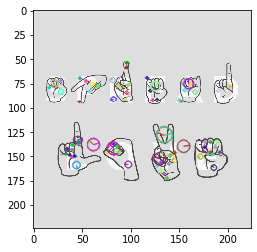

In [0]:
imagen_nom = str(708)+"_img.jpg"
ruta_archivo_img = os.path.join(directorio,carpeta_fotos[0],imagen_nom)
image = cv2.imread(ruta_archivo_img)
image = cv2.resize(image, (224,224))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image.astype('uint8')
sift = cv2.xfeatures2d.SIFT_create(200)
k, d = sift.detectAndCompute(image, None)
image_sift = cv2.drawKeypoints(image,k, image_sift, 
                               flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(image_sift)

In [0]:
print(k, d)

[<KeyPoint 0x7fe893e2aae0>, <KeyPoint 0x7fe893e2af30>, <KeyPoint 0x7fe893e2a510>, <KeyPoint 0x7fe893e2af00>, <KeyPoint 0x7fe893e2a030>, <KeyPoint 0x7fe893e2aed0>, <KeyPoint 0x7fe893e2ab40>, <KeyPoint 0x7fe893e2af60>, <KeyPoint 0x7fe893e2ad20>, <KeyPoint 0x7fe893e2aba0>, <KeyPoint 0x7fe7f4ba4e10>, <KeyPoint 0x7fe7f4ba4bd0>, <KeyPoint 0x7fe7f4ba4ed0>, <KeyPoint 0x7fe7f4ba4e40>, <KeyPoint 0x7fe7f4ba4c60>, <KeyPoint 0x7fe7f4ba4f00>, <KeyPoint 0x7fe7f4ba4f60>, <KeyPoint 0x7fe7f4ba4f90>, <KeyPoint 0x7fe7f4ba4fc0>, <KeyPoint 0x7fe7f4ba4d80>, <KeyPoint 0x7fe7f4ba4ea0>, <KeyPoint 0x7fe8946dc1b0>, <KeyPoint 0x7fe8946dc0f0>, <KeyPoint 0x7fe8946dc0c0>, <KeyPoint 0x7fe8946dc240>, <KeyPoint 0x7fe8946dc030>, <KeyPoint 0x7fe8946dc210>, <KeyPoint 0x7fe8946dc1e0>, <KeyPoint 0x7fe8946b1f60>, <KeyPoint 0x7fe8946b1750>, <KeyPoint 0x7fe8946b1bd0>, <KeyPoint 0x7fe8946b10f0>, <KeyPoint 0x7fe8946b1540>, <KeyPoint 0x7fe8946b1720>, <KeyPoint 0x7fe8946b1480>, <KeyPoint 0x7fe8946b18a0>, <KeyPoint 0x7fe8946b10c0>, 

In [0]:
k[0]

<KeyPoint 0x7fe8946b87e0>

In [0]:
imagen_nom = str(0)+"_img.jpg"
ruta_archivo_img = os.path.join(directorio,carpeta_fotos[0],imagen_nom)
image = cv2.imread(ruta_archivo_img)
image = cv2.resize(image, (224,224))


In [0]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image.astype('uint8')

In [0]:
image

array([[252, 249,  51, ..., 247, 251, 253],
       [253, 249,  50, ..., 254, 254, 253],
       [253, 248,  52, ..., 252, 248, 242],
       ...,
       [217, 239, 245, ...,  98,  78,  82],
       [236, 247, 254, ...,  91,  94,  92],
       [237, 254, 255, ..., 101,  99, 102]], dtype=uint8)

In [0]:
sift = cv2.xfeatures2d.SIFT_create(200)
k, d = sift.detectAndCompute(image, None)
print(d)
print(d.shape)  

[[  1.  15. 127. ...   0.   3.  11.]
 [ 10.   4.  30. ...   9.   0.   2.]
 [  7.  14.   9. ...  55.  22.   1.]
 ...
 [ 33.   2.   9. ...   2.   7.  22.]
 [  7.  41.  39. ...  10.  13.  18.]
 [  7.   0.   2. ...  40.  37.   6.]]
(200, 128)
